# Homework #4: Numerically Solving Systems of Equations
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 2/20/2020|

In this notebook, we will attempt to numerically solve the following system of equations:

\begin{align*}
x_1^2 + x_1x_2 &= 10\\
x_2 + 3x_1x_2^2 &= 57
\tag{1}
\end{align*}

That is, we wish to find the values of $x_1$ and $x_2$ such that they simultaneously satisfy both equations.

## 1. Graphical Analysis

Before we attempt a numerical solution, let's first plot both equations in the $x_1$-$x_2$ plane to get a rough idea of where the possible solution may lie&mdash;i.e., the intersection of both lines through some point $(x_1, x_2)$.

We can define two functions, $f^\prime_1$ and $f^\prime_2$, both in terms of $x_1$ alone, by solving each equation for $x_2$.

\begin{align*}
x_1^2 + x_1x_2 &= 10\\
x_1x_2 &= 10 - x_1^2\\
f^\prime_1(x_1) = x_2 &= \frac{10 - x_1^2}{x_1}
\tag{2}
\end{align*}

Using the quadractic formula for the second equation:
\begin{align*}
(3x_1)x_2^2 + (1)x_2 - 57 &= 0\\
x_2 &= \frac{-1 \pm \sqrt{1^2 -4(3x_1)(-57)}}{2(3x_1)}\\
f^\prime_2(x_1) = x_2 &= \frac{\pm\sqrt{1 + 684x_1}-1}{6x}
\tag{3}
\end{align*}

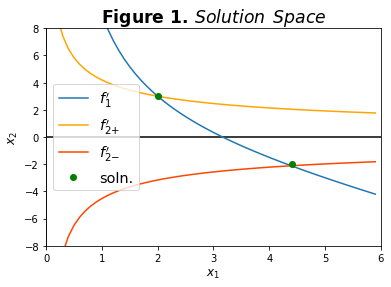

In [1]:
import matplotlib.pyplot as plt
import numpy as np

f1 = lambda x: (10.-x*x)/x
f2p = lambda x: (np.sqrt(1.+684*x)-1)/6./x # positive soln.
f2m = lambda x: (-np.sqrt(1.+684*x)-1)/6./x # negative soln
x = np.arange(.1, 6, .1)

plt.figure()
plt.title(r'Figure 1. $Solution \hspace{.5} Space$', fontsize='xx-large', fontweight='bold')
plt.xlabel(r'$x_1$', fontsize='large')
plt.xlim(0, 6)
plt.ylabel(r'$x_2$', fontsize='large')
plt.ylim(-8, 8)
plt.axvline(color='k')
plt.axhline(color='k')
plt.plot(x, f1(x), label='$f^\prime_1$')
plt.plot(x, f2p(x), color='orange', label='$f^\prime_{2\plus}$')
plt.plot(x, f2m(x), color='orangered', label='$f^\prime_{2\minus}$')
plt.plot(2, 3, 'o', color='green', label='soln.')
plt.plot(4.4, -2, 'o', color='green')
plt.legend(loc='best', fontsize='x-large')
plt.show()

As seen in Fig. 1, we expect to find solutions around $(2, 3)$ and $(4.4, -2)$.

## 2. Newton–Raphson Method: Theory

We can use the ***Newton–Raphson method*** to solve Eq. 1 or any _N_ systems of nonlinear equations, with _N_ unknowns:

\begin{equation}
f_{i}(x_{1}, x_{2},\dots, x_{N})=0, \quad i=1,2,....,N
\end{equation}

And for Eq. 1:

\begin{equation}
{\bf f}=\left[ \begin{array}{c} f_{1} \\ f_{2}  \end{array}\right] = \left[ \begin{array}{c} x_{1}^2+x_{1}x_{2}-10 \\ x_{2}+3x_{1}x_{2}^2-57 \end{array}\right] = 0
\tag{4}
\end{equation}

As with the Newton–Raphson method in general, we begin with an initial guess reasonably close to the true solution(s) then make a correction using its tangent line, i.e.,

\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})=0, \quad i=1,2
\end{equation}

Expanding as a Taylor series,

\begin{equation}
\approx f_{i}(x_{1},x_{2})+\frac{\partial f_{i}}{\partial x_{1}}\Delta x_{1}+\frac{\partial f_{i}}{\partial x_{2}}\Delta x_{2}=0, \quad i=1,2
\end{equation}

Expressing this first-order approximation in matrix form,

\begin{equation}
\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] + \begin{bmatrix} \dfrac{\partial f_{1}}{\partial x_{1}} & \dfrac{\partial f_{1}}{\partial x_{2}}  \\ \dfrac{\partial f_{2}}{\partial x_{1}} & \dfrac{\partial f_{2}}{\partial x_{2}} \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] = 0
\tag{5}
\end{equation}

or

\begin{equation}
\mathbf{J} \mathbf{\Delta x} = -\mathbf{f},
\tag{6}
\end{equation}

where $\mathbf{J}$ is the _Jacobian matrix_. Following _Cramer's rule_, we solve for the vector of unknowns $\mathbf{\Delta x} = (\Delta x_1, \Delta x_2)^\mathrm{T}$,

\begin{equation}
\mathbf{\Delta x} = -\mathbf{J}^{-1}\mathbf{f}
\tag{7}
\end{equation}

where the _inverse_ of the Jacobian matrix can be found by multiplying the reciprocal of its _determinant_ by the _transpose_ of the _cofactor matrix_ (also known as the _adjugate_ matrix):

\begin{equation}
\mathbf{J}^{-1} = \dfrac{1}{\det(\mathbf{J})}\mathbf{C}^\textrm{T}.
\tag{8}
\end{equation}

The matrix of cofactors $\mathbf{C}$ can be found by first finding the _matrix of minors_ $\mathbf{M}$, where each element is a _minor_ of the $i$th row and $j$th column of $\mathbf{J}$, i.e., the determinant of the _submatrix_ formed by deleting said $i$th row and $j$th column. Then multiplying each $(i, j)$ minor by $(-1)^{i+j}$ yields its corresponding _cofactor_.

The following compares these matricies and values for a simple $2$ × $2$ matrix $\mathbf{A}$:

\begin{align*}
\mathbf{A} &= \begin{bmatrix} a & b \\ c & d \end{bmatrix}\\
\det(\mathbf{A}) &= \begin{vmatrix} a & b \\ c & d \end{vmatrix} = ad - bc\\
\mathbf{M} &= \begin{bmatrix} d & c \\ b & a \end{bmatrix}\\
\mathbf{C} &= \begin{bmatrix} d & -c \\ -b & a \end{bmatrix}\\
\mathbf{C}^\mathrm{T} &= \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}\\
\mathbf{A}^{-1} &= \dfrac{1}{\det (\mathbf{A})}\mathbf{C}^\mathrm{T}\\
&= \dfrac{1}{ad - bc}\begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
\end{align*}

Substituting this $\mathbf{A}$ for our Jacobian matrix $\mathbf{J}$, we find that Eq. 7 ultimately yields

\begin{eqnarray}
\Delta x_1=\frac{bf_2-f_1d}{ad-bc}\\
\Delta x_2=\frac{f_1c-af_2}{ad-bc}
\tag{9}
\end{eqnarray}

For Eq. 4, we can analytically find each partial derivative of the Jacobian matrix:

\begin{align*}
a = \dfrac{\partial f_{1}}{\partial x_{1}} &= 2x_1 + x_2\\
b = \dfrac{\partial f_{1}}{\partial x_{2}} &= x_1\\
c = \dfrac{\partial f_{2}}{\partial x_{1}} &= 3x_2^2\\
d = \dfrac{\partial f_{2}}{\partial x_{2}} &= 6x_1x_2+ 1
\tag{10}
\end{align*}

With these results we can compute the determinant of the Jacobian matrix:

\begin{align*}
\det (\mathbf{J}) &= ad - bc\\
&= (2x_1 + x_2)(6x_1x_2+ 1) - (x_1)(3x_2^2)\\
&= 12x_1^2x_2 + 3x_2^2x_1 + 2x_1 + x_2
\tag{11}
\end{align*}

And we can also compute the numerators of Eq. 9, namely

\begin{align*}
bf_2-f_1d &= -6x_1^3x_2 -3x_1^2x_2^2 + 60x_1x_2 - x_1^2 - 57x_1\\
f_1c-af_2 &= -3x_1^2x_2^2 - 2x_1x_2 - 31x_2^2 + 114x_1 + 57x_2
\tag{12}
\end{align*}

Putting it all together,

\begin{align*}
\Delta x_1 &= \dfrac{-6x_1^3x_2 -3x_1^2x_2^2 + 60x_1x_2 - x_1^2 - 57x_1}{12x_1^2x_2 + 3x_2^2x_1 + 2x_1 + x_2}\\
\Delta x_2 &= \dfrac{-3x_1^2x_2^2 - 2x_1x_2 - 31x_2^2 + 114x_1 + 57x_2}{12x_1^2x_2 + 3x_2^2x_1 + 2x_1 + x_2}
\tag{13}
\end{align*}

## 3. Newton–Raphson Method: Specific Implementation

We now have all the analytic parts needed to write some functions to solve Eq. 1 using the Newton-Raphson method. Let's begin by defining a function `F(x)`, similar to $\mathbf{f}$, that evaluates and returns $f_1$ and $f_2$ with vector values $(x_1, x_2)$.

In [2]:
def F(x):
    """
    Return the evaluations of f1 and f2 with values x1 and x2 (see Eq. 4).
    
    Parameters
    ----------
    x : array_like
        A vector containing the values of x1 and x2
    
    Returns
    -------
    f : array_like
        A vector containing the evaluations of f1 and f2.
    """
    f = [0, 0]
    f[0] = x[0]*x[0] + x[0]*x[1] - 10.
    f[1] = x[1] + 3.*x[0]*x[1]*x[1] - 57.
    return f

Next, let's define a function `Dx(x)` that will compute and return the values of $\Delta x_1$ and $\Delta x_2$ for a given $(x_1, x_2)$, as defined in Eq. 13.

In [3]:
def DX(x):
    """
    Return the evaluations of Dx1 and Dx2 with values x1 and x2 (see Eq. 13).
    
    Parameters
    ----------
    x : array_like
        A vector containing the values of x1 and x2
    
    Returns
    -------
    d : array_like
        A vector containing the evaluations of D(x).
    """
    d = [0, 0]
    det = 12*x[0]**2*x[1] + 3*x[1]**2*x[0] + 2*x[0] + x[1]
    d[0] = (-6*x[0]**3*x[1] - 3*x[0]**2*x[1]**2 + 60*x[0]*x[1] - x[0]**2 - 57*x[0]) / det
    d[1] = (-3*x[0]**2*x[1]**2 - 2*x[0]*x[1] - 31*x[1]**2 + 114*x[0] + 57*x[1]) / det
    return d

Finally, we'll write our specific Newton-Raphson method starting with some guess $\mathbf{x_0}$ and try to satisfy $\mathbf{f}(\mathbf{x_0}+\mathbf{\Delta x}) = 0$, repeating iteratively&mdash;at most `Nmax` times&mdash;until the result approaches zero to within a given precision, `eps`.

In [4]:
import numpy as np

def newtonraphson_spec(x0, Nmax, eps=1.e-8):
    """
    Find and return the numerical solution to Eq. 1
    
    Parameters
    ----------
    x0 : array_like
        A vector containing the values of x10 and x20
    Nmax : int
        The maximum number of iterations
    eps : float
        Stop iterating once evaluation is comparable to this precision threshold
    
    Returns
    -------
    x0 : array_like
        A vector containing the solution to Eq. 1 to within eps precision.
    """
    for i in range(Nmax):
        x0 = np.asarray(x0) + np.asarray(DX(x0))
        fs = F(x0)
        f1 = fs[0]
        f2 = fs[1]
        print("N =", i)
        print("    DX =", DX(x0))
        print("    X0 =", x0)
        print("    F =", fs)
        if abs(f1) < eps and abs(f2) < eps:
            print("Solution is at", x0," after ", i," iterations, with a precision of ", fs)
            break
    return x0

In [5]:
newtonraphson_spec([1,6], 15)

N = 0
    DX = [-0.0796452659844305, 1.6799157204016426]
    X0 = [1.84042553 1.85106383]
    F = [-3.2060887279311903, -36.230628088188546]
N = 1
    DX = [0.18579450045531185, -0.5527038847021811]
    X0 = [1.76078027 3.53097955]
    F = [-0.6823737437332493, 12.3902357504506]
N = 2
    DX = [0.002407153881393777, 0.022008393161797344]
    X0 = [1.94657477 2.97827567]
    F = [-0.41341042109296033, -2.222634348268997]
N = 3
    DX = [0.0005516636143574466, -0.0006493078290687936]
    X0 = [1.94898192 3.00028406]
    F = [-0.35397008849998457, -1.3672383692881382]
N = 4
    DX = [2.8568008475178773e-07, 2.4234278330581522e-05]
    X0 = [1.94953358 2.99963475]
    F = [-0.3514301192174898, -1.3757748839275976]
N = 5
    DX = [5.145725568916073e-07, -6.070270890181843e-07]
    X0 = [1.94953387 2.99965899]
    F = [-0.3513809028492503, -1.3748926184331864]
N = 6
    DX = [2.635505343183411e-10, 2.2509126974933543e-08]
    X0 = [1.94953438 2.99965838]
    F = [-0.3513785363737192, -1.3749

array([1.94953438, 2.9996584 ])

Trying it out with an initial guess of $(1, 6)$ seems to have gotten us fairly close to our graphical expectation of $(2, 3)$. However, notice among the outputs that $\mathbf{x} + \mathbf{\Delta x}$ reaches machine precision in just 7 iterations. In fact, the evaluations of $\mathbf{f}(\mathbf{x} + \mathbf{\Delta x})$ never even get close to the default precision threshold, let alone zero. The issue is also worsened by the accumulation of round-off errors among all the floating point operations when computing Eq. 13 for $\mathbf{\Delta x}$.

Let's see how we fare in finding the other graphical solution ~$(4.4, -2)$ with an initial guess of $(5, -4)$.

In [6]:
newtonraphson_spec([5, -4], 12)

N = 0
    DX = [-0.2470688575929483, 0.43666074170442354]
    X0 = [ 4.69601677 -2.62264151]
    F = [-0.26339499580273085, 37.27846925090287]
N = 1
    DX = [-0.031912307266055685, 0.06652116227719362]
    X0 = [ 4.44894791 -2.18598077]
    F = [0.06782296414925248, 4.592071104700658]
N = 2
    DX = [3.59392537343539e-05, 0.0016860240219111814]
    X0 = [ 4.41703561 -2.11945961]
    F = [0.14847500613668707, 0.4059568538116878]
N = 3
    DX = [1.5660397008205976e-05, 9.64648509501758e-06]
    X0 = [ 4.41707155 -2.11777358]
    F = [0.1561636142914793, 0.3134595100576334]
N = 4
    DX = [9.157320559119325e-09, 7.442329044482009e-08]
    X0 = [ 4.41708721 -2.11776393]
    F = [0.15631140491561624, 0.31313844483396736]
N = 5
    DX = [6.685310430828809e-10, 4.116046530873242e-10]
    X0 = [ 4.41708722 -2.11776386]
    F = [0.15631179515410132, 0.3131344653788304]
N = 6
    DX = [3.9125461732550746e-13, 3.1772653066125824e-12]
    X0 = [ 4.41708722 -2.11776386]
    F = [0.1563118014623246

array([ 4.41708722, -2.11776386])

The result is at least consistent. This time notice how in the last four iterations the algorithm starts to oscillate around the solution. In particular, the value of $\Delta x_2$ begins to flip between `-2.315116078851766e-16` and `3.638039552481346e-16`. Again, the evaluation of $\mathbf{f}(\mathbf{x} + \mathbf{\Delta x})$ never approaches `eps = 1.e-8`, but it gets a lot closer than the previous guess and numerical solution.

## 4. Bonus: Reasonable Guess

Between the graphical and numerical methods, we can be fairly confident $(2, 3)$ is a solution. In fact, we can check it exactly by plugging it back into Eq. 1:

\begin{align*}
x_1^2 + x_1x_2 &= 10\\
2^2 + 2(3) &= 10\\
4 + 6 &= 10
\end{align*}

\begin{align*}
x_2 + 3x_1x_2^2 &= 57\\
3 + 3(2)(3)^2 &= 57\\
3 + 54 &= 57
\end{align*}

Sure enough, the equations are satisfied. What about the other solution? If we take the numerical solution to be more accurate than our graphical approximation, we had found $x_1 \simeq 4.41708722$ and $x_2 \simeq -2.11776386$. Assuming an exact solution to exist, let's try squaring each, and taking instead the square root of the closest, reasonable integer.

For example, for $x_1$, $(4.41708722)^2 \simeq 19.51$, so let's assume $x_1 = \sqrt{20}$ to be an exact solution. Similarly, $(-2.11776386)^2 \simeq 4.48$, so let's also assume $x_2 = -\sqrt{5}$ (since chosing $\sqrt{4} = 2$ doesn't match our predictions). Plugging in these exact guesses,

\begin{align*}
\sqrt{20}^2 + \sqrt{20}(-\sqrt{5}) &= 10\\
20 - \sqrt{100} &= 10\\
20 - 10 &= 10
\end{align*}

So far so good.

\begin{align*}
-\sqrt{5} + 3\sqrt{20}(-\sqrt{5})^2 &= 57\\
-\sqrt{5} + 15\sqrt{4(5)} &= 57\\
-\sqrt{5} + 30\sqrt{5} &= 57\\
29\sqrt{5} &= 57\\
\sqrt{841(5)} &= 57\\
~64.85\dots &\neq 57
\end{align*}

Not quite. Perhaps the second solution does not have an exact form.